In [8]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.impute import SimpleImputer

In [9]:
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 10)
pd.set_option("display.width", 1000)

data = pd.read_csv('diabetes.csv')
preg_and_outcome = pd.DataFrame({
    "Pregnancies": data["Pregnancies"],
    "Outcome": data["Outcome"]
})
# Utrata danych jest w miejscach wypełnionych zerami (oprócz kolumn Outcome i Pregnancies)
# zamieniamy zera na NaN aby ułatwić usuwanie wierszy
data = data.drop(["Pregnancies", "Outcome"], axis=1)[data > 0] # w tych kolumnach 0 jest OK
# wrzucamy kolumny z powrotem
data.insert(0, "Pregnancies", preg_and_outcome["Pregnancies"])
data["Outcome"] = preg_and_outcome["Outcome"]

# wyrzucamy
data = data.dropna()

print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
3              1     89.0           66.0           23.0     94.0  28.1                     0.167   21        0
4              0    137.0           40.0           35.0    168.0  43.1                     2.288   33        1
6              3     78.0           50.0           32.0     88.0  31.0                     0.248   26        1
8              2    197.0           70.0           45.0    543.0  30.5                     0.158   53        1
13             1    189.0           60.0           23.0    846.0  30.1                     0.398   59        1
..           ...      ...            ...            ...      ...   ...                       ...  ...      ...
753            0    181.0           88.0           44.0    510.0  43.3                     0.222   26        1
755            1    128.0           88.0           39.0    110.0  36.5                     1.057   37        1
7

In [10]:
x = data.drop(["Outcome"], axis=1)
print(x)
y = data.Outcome
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age
3              1     89.0           66.0           23.0     94.0  28.1                     0.167   21
4              0    137.0           40.0           35.0    168.0  43.1                     2.288   33
6              3     78.0           50.0           32.0     88.0  31.0                     0.248   26
8              2    197.0           70.0           45.0    543.0  30.5                     0.158   53
13             1    189.0           60.0           23.0    846.0  30.1                     0.398   59
..           ...      ...            ...            ...      ...   ...                       ...  ...
753            0    181.0           88.0           44.0    510.0  43.3                     0.222   26
755            1    128.0           88.0           39.0    110.0  36.5                     1.057   37
760            2     88.0           58.0           26.0     16.0  28.4            

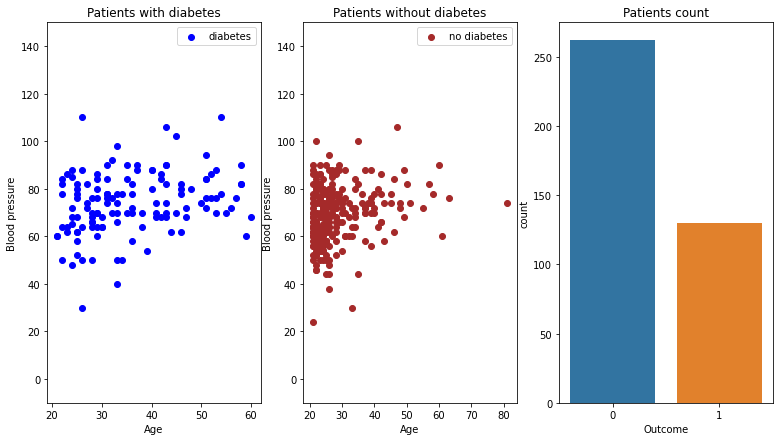

In [11]:

fig, ax = plt.subplots(1, 3, figsize=(13, 7))
ax[0].scatter(x=data[data.Outcome == 1].Age, y=data[data.Outcome == 1].BloodPressure,
              label="diabetes", c='blue')
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Blood pressure")
ax[0].set_title("Patients with diabetes")
ax[0].legend()
ax[0].set_ylim([-10, 150])

ax[1].scatter(x=data[data.Outcome == 0].Age, y=data[data.Outcome == 0].BloodPressure,
              label="no diabetes", c='brown')
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Blood pressure")
ax[1].set_title("Patients without diabetes")
ax[1].legend()
ax[1].set_ylim([-10, 150])

ax[2] = sns.countplot(x="Outcome", data=data)
ax[2].set_title("Patients count")
plt.show()


In [21]:
tries = 10
log_reg_accuracy = []
for i in range(tries):
    X_train, X_test, y_train, y_test = train_test_split(x, y)

    l_reg = LogisticRegression(solver='lbfgs', max_iter=250)
    l_reg.fit(X_train, y_train)
    y_pred = l_reg.predict(X_test)  # przewidujemy na podstawie X_test
    log_reg_accuracy.append(accuracy_score(y_test, y_pred)*100.0)

print("Logistic regresssion accuracies: ", log_reg_accuracy, sep=", ")
print("Mean logistic regression accuracy: ", mean(log_reg_accuracy))


Logistic regresssion accuracies: , [81.63265306122449, 82.6530612244898, 75.51020408163265, 75.51020408163265, 83.6734693877551, 75.51020408163265, 78.57142857142857, 73.46938775510205, 79.59183673469387, 78.57142857142857]
Mean logistic regression accuracy:  78.46938775510205


In [22]:
# jądro svc
svc_linear_accuracy = []
svc = svm.SVC(kernel="linear", C=0.4)
for i in range(tries):
    svc.fit(x, y)
    y_pred = svc.predict(x)
    svc_linear_accuracy.append(accuracy_score(y_pred, y)*100.0)

svc_rbf_accuracy = []
svc = svm.SVC(kernel="rbf", C=0.4)
for i in range(tries):
    svc.fit(x, y)
    y_pred = svc.predict(x)
    svc_rbf_accuracy.append(accuracy_score(y_pred, y)*100.0)


In [23]:
# k najbliższych sąsiadów
from sklearn.neighbors import KNeighborsClassifier
knn_accuracy = []
for i in range(tries):
    X_train, X_test, y_train, y_test = train_test_split(x, y)

    neigh = KNeighborsClassifier(n_neighbors=10)
    neigh.fit(X_train, y_train)
    knn_accuracy.append(neigh.score(X_test,y_test)*100.0)


Mean accuracies:
Linear kernel:  78.31632653061224
RBF kernel 76.78571428571429
KNN Accuracy:  75.51020408163265


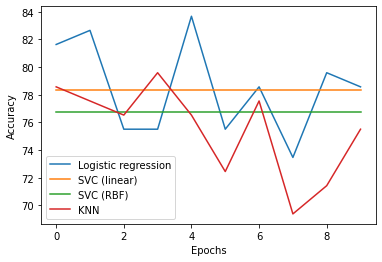

In [24]:

print("Mean accuracies:" )
print("Linear kernel: ", mean(svc_linear_accuracy))
print("RBF kernel", mean(svc_rbf_accuracy))
print("KNN Accuracy: ", mean(knn_accuracy))
ax_log_reg = plt.plot(list(range(tries)), log_reg_accuracy, label="Logistic regression")
ax_svc_linear = plt.plot(list(range(tries)), svc_linear_accuracy, label="SVC (linear)")
ax_svc_rbf = plt.plot(list(range(tries)), svc_rbf_accuracy, label="SVC (RBF)")
ax_svc_knn = plt.plot(list(range(tries)), knn_accuracy, label="KNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.savefig("remove_rows.png")
plt.legend()
plt.show()